# 0 - Construct Your Graph

In [86]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

class edge():
    def __init__(self, s: str, t: str, weight:float):
        self.s = s
        self.t = t
        self.weight = weight

class node():
    def __init__(self, name: str, value = 2):
        self.name = name
        self.neighbors = [] # list of edge objects !!
        self.value = value   
        
    def neighbors_name(self) -> list:
        return [(e.t, e.weight) for e in self.neighbors]
        
class weightedDiGraph():
    def __init__(self, elist: list):
        self.elist = elist
        self.node_names = list(set([s for s, t, w in elist] + [t for s,t,w in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, e:edge):
        self.nodes[e.s].neighbors.append(e)
    
    def create_graph(self):
        for s,t,w in self.elist:
            e = edge(s,t,w)
            self.add_edge(e)
            
    def add_values(self, A:pd.Series):
        for n in A.keys():
            self.nodes[n].value = A[n]
            
    def info(self) -> dict:
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    

def draw(G1:weightedDiGraph, color = 'orange'):
    G = nx.DiGraph()
    G.add_weighted_edges_from(G1.elist)
    plt.figure(figsize=(20,10))

    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, node_size=2000, node_color=color, font_size=40, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, font_size=20,  edge_labels = nx.get_edge_attributes(G,'weight'))     

In [87]:
elist = [('A0', 'B0', 0.5), ('A1', 'B0', 0.4), ('A2', 'B0', 0.3),('A3', 'B0', 0.2),('A4', 'B0', 0.1)]

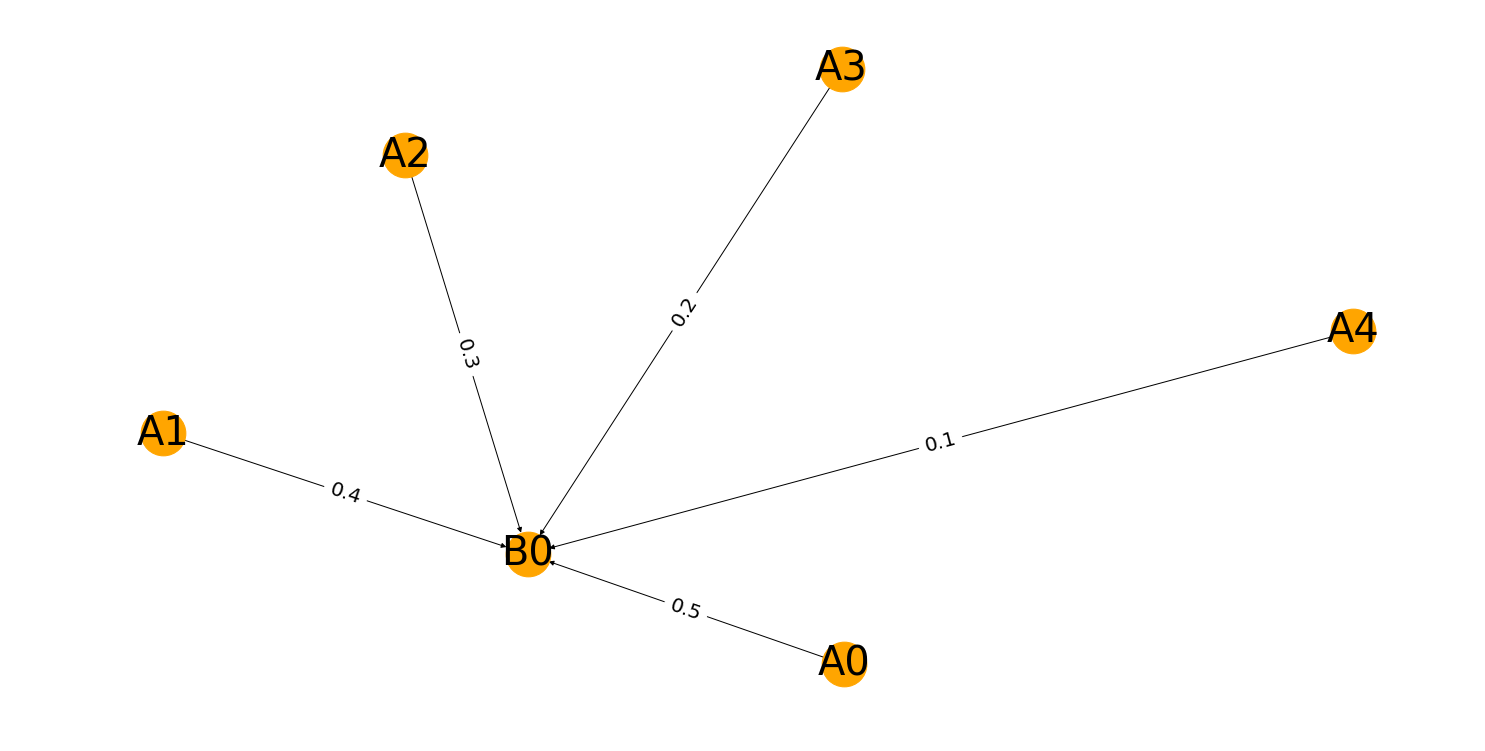

In [88]:
G = weightedDiGraph(elist)
draw(G1 = G)

# 1 - Add values

In [89]:
import pandas as pd
values = {'A0': [1,0,1,0],'A1': [1,0,0,0],'A2': [0,0,1,0],'A3': [1,0,1,0],'A4': [1,1,1,1]}
df = pd.DataFrame(values)

In [90]:
df

,A0,A1,A2,A3,A4
0,1,1,0,1,1
1,0,0,0,0,1
2,1,0,1,1,1
3,0,0,0,0,1


In [91]:
G.info()

{'A2': [('B0', 0.3)],
 'B0': [],
 'A4': [('B0', 0.1)],
 'A3': [('B0', 0.2)],
 'A1': [('B0', 0.4)],
 'A0': [('B0', 0.5)]}

In [92]:
A = df.iloc[0]
A

A0    1
A1    1
A2    0
A3    1
A4    1
Name: 0, dtype: int64

In [93]:
type(A)

pandas.core.series.Series

In [94]:
A.keys()

Index(['A0', 'A1', 'A2', 'A3', 'A4'], dtype='object')

In [95]:
G.add_values(A)

In [96]:
[(n, G.nodes[n].value) for n in G.nodes]

[('A2', 0), ('B0', 2), ('A4', 1), ('A3', 1), ('A1', 1), ('A0', 1)]

# 2 - Reverse the Graph 

In [99]:
class reversedGraph(): 
    @staticmethod
    def reverse(G):
        reversed_elist = [(t,s, w) for s, t, w in  G.elist]
        return weightedDiGraph(reversed_elist)

In [100]:
R = reversedGraph().reverse(G)

In [101]:
R.info()

{'B0': [('A0', 0.5), ('A1', 0.4), ('A2', 0.3), ('A3', 0.2), ('A4', 0.1)],
 'A2': [],
 'A4': [],
 'A3': [],
 'A1': [],
 'A0': []}

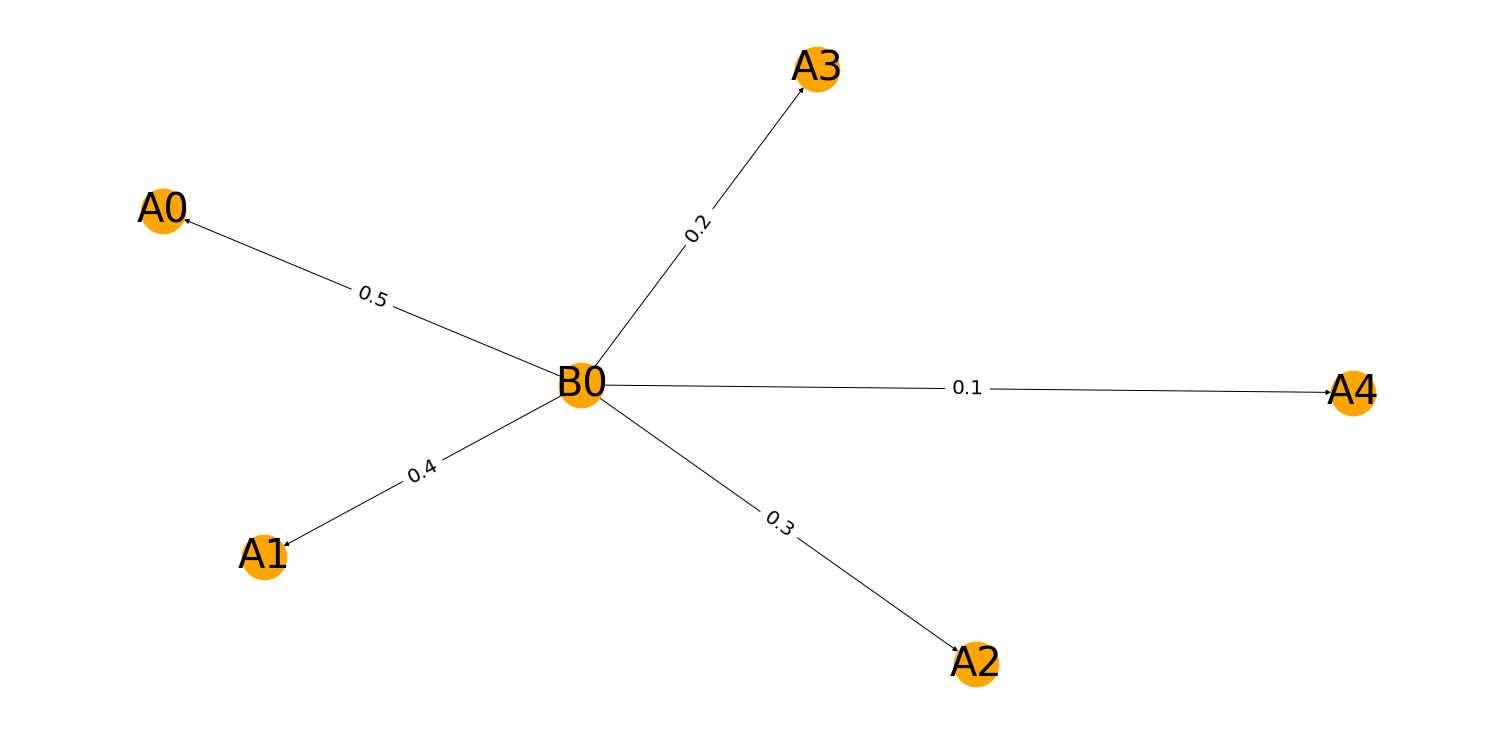

In [104]:
draw(R)

In [112]:
[(n, R.nodes[n].value, R.nodes[n].value * w) for n, w in R.nodes['B0'].neighbors_name()]

[('A0', 2, 1.0),
 ('A1', 2, 0.8),
 ('A2', 2, 0.6),
 ('A3', 2, 0.4),
 ('A4', 2, 0.2)]

# 3 - Add Values

In [120]:
R.add_values(A)

In [121]:
A

A0    1
A1    1
A2    0
A3    1
A4    1
Name: 0, dtype: int64

# 4 - Compute the outcome

In [116]:
[(n, R.nodes[n].value, w, R.nodes[n].value * w) for n, w in R.nodes['B0'].neighbors_name()]

[('A0', 1, 0.5, 0.5),
 ('A1', 1, 0.4, 0.4),
 ('A2', 0, 0.3, 0.0),
 ('A3', 1, 0.2, 0.2),
 ('A4', 1, 0.1, 0.1)]

In [118]:
[R.nodes[n].value * w for n, w in R.nodes['B0'].neighbors_name()]

[0.5, 0.4, 0.0, 0.2, 0.1]

In [119]:
np.sum([R.nodes[n].value * w for n, w in R.nodes['B0'].neighbors_name()])

1.2000000000000002